In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/opencv-samples-images/hand.jpg
/kaggle/input/opencv-samples-images/house.jpg
/kaggle/input/opencv-samples-images/Background_Subtraction_Tutorial_frame.mp4
/kaggle/input/opencv-samples-images/someshapes.jpg
/kaggle/input/opencv-samples-images/Origin_of_Species.jpg
/kaggle/input/opencv-samples-images/Background_Subtraction_Tutorial_frame.png
/kaggle/input/opencv-samples-images/scan.jpg
/kaggle/input/opencv-samples-images/minions.jpg
/kaggle/input/opencv-samples-images/waldo.jpg
/kaggle/input/opencv-samples-images/blobs.jpg
/kaggle/input/opencv-samples-images/Background_Subtraction_Tutorial_frame_1.png
/kaggle/input/opencv-samples-images/Background-Subtraction-Tutorial_merged.gif
/kaggle/input/opencv-samples-images/Background-Subtraction-Tutorial_merged.mp4
/kaggle/input/opencv-samples-images/WaldoBeach.jpg
/kaggle/input/opencv-samples-images/data/blox.jpg
/kaggle/input/opencv-samples-images/data/chessboard.png
/kaggle/input/opencv-samples-images/data/apple.jpg
/kaggle/input

## 라이브러리 불러오기

In [2]:
import numpy as np 
import matplotlib.pyplot as plt 
import cv2 
import matplotlib as mpl

print(np.__version__)
print(mpl.__version__)
print(cv2.__version__)

1.21.6
3.5.3
4.5.4


## 이미지 Sharpening 
- 이미지의 edges 강화하거나 강조한다. 

### OPENCV 색상 기본버전
- 우리가 아는 색상 RGB : Red, Green, Blue
- opencv 아는 색상 BGR : Blue, Green, Red

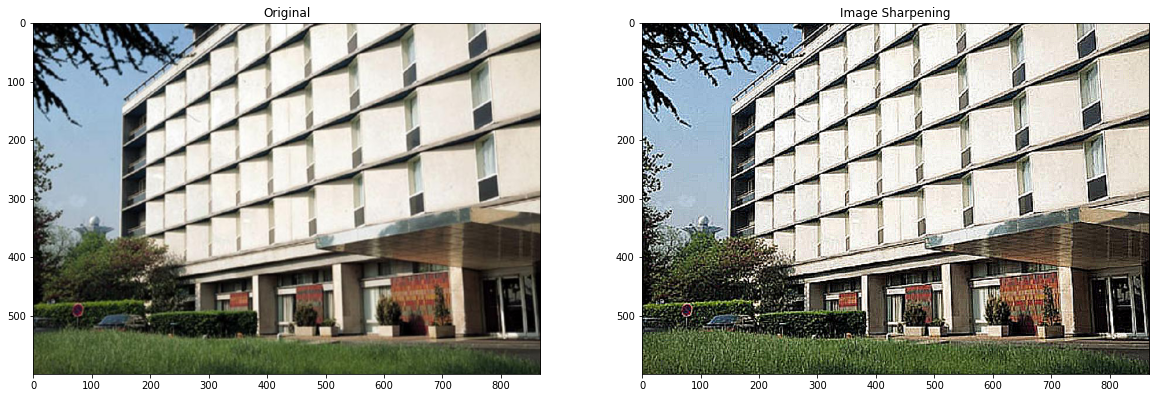

In [9]:
img_path = '/kaggle/input/opencv-samples-images/data/building.jpg'

img = cv2.imread(img_path) 
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# kerner_sharpening
sharpening_array = np.array([[-1, -1, -1], 
                            [-1, 9, -1], 
                            [-1, -1, -1]])

conv_img = cv2.filter2D(img, -1, sharpening_array)

fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize=(20, 10))
ax[0].imshow(img)
ax[0].set_title('Original')
ax[1].imshow(conv_img)
ax[1].set_title('Image Sharpening')

plt.show()


## Thresholding

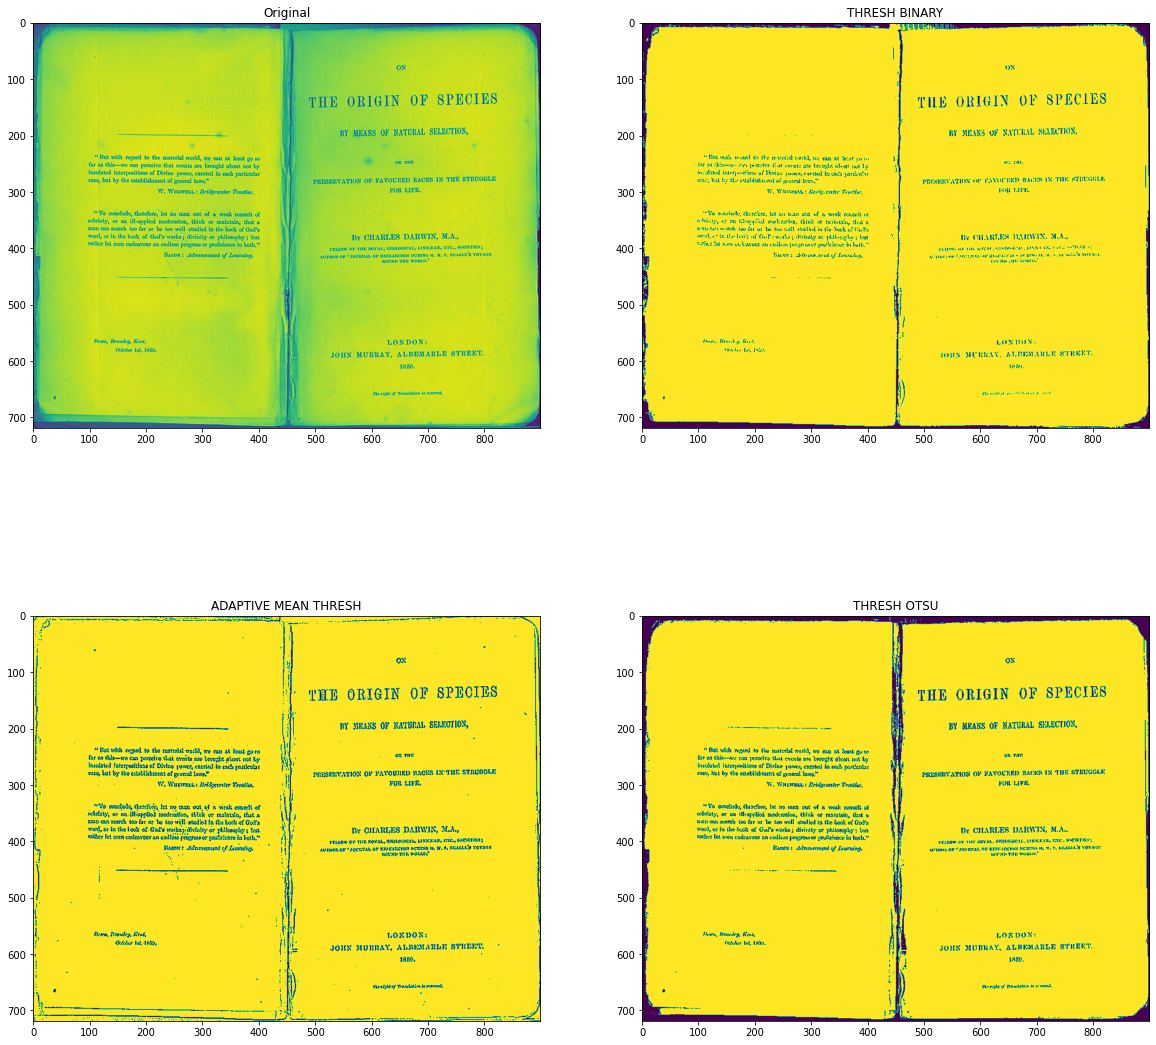

In [20]:
img_path = '/kaggle/input/opencv-samples-images/Origin_of_Species.jpg'
img = cv2.imread(img_path, 0)

# print(img)
# 0 : black, 255 : white 
# 각 값이 127 이하인 것으로 0으로 처리
ret, thresh1 = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)
# print(thresh1)

# 이미지의 노이즈 제거
img2 = cv2.GaussianBlur(img, (3, 3), 0)

# AdaptiveThreshold
thresh2 = cv2.adaptiveThreshold(img2, 
                                255, 
                                cv2.ADAPTIVE_THRESH_MEAN_C, 
                                cv2.THRESH_BINARY, 3, 5)

# 오츠의 알고리즘
_, thresh3 = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)


fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize=(20, 20))
ax[0, 0].imshow(img)
ax[0, 0].set_title('Original')
ax[0, 1].imshow(thresh1)
ax[0, 1].set_title('THRESH BINARY')
ax[1, 0].imshow(thresh2)
ax[1, 0].set_title('ADAPTIVE MEAN THRESH')
ax[1, 1].imshow(thresh3)
ax[1, 1].set_title('THRESH OTSU')

plt.show()

## 이미지의 팽창(Dilation), Erosion

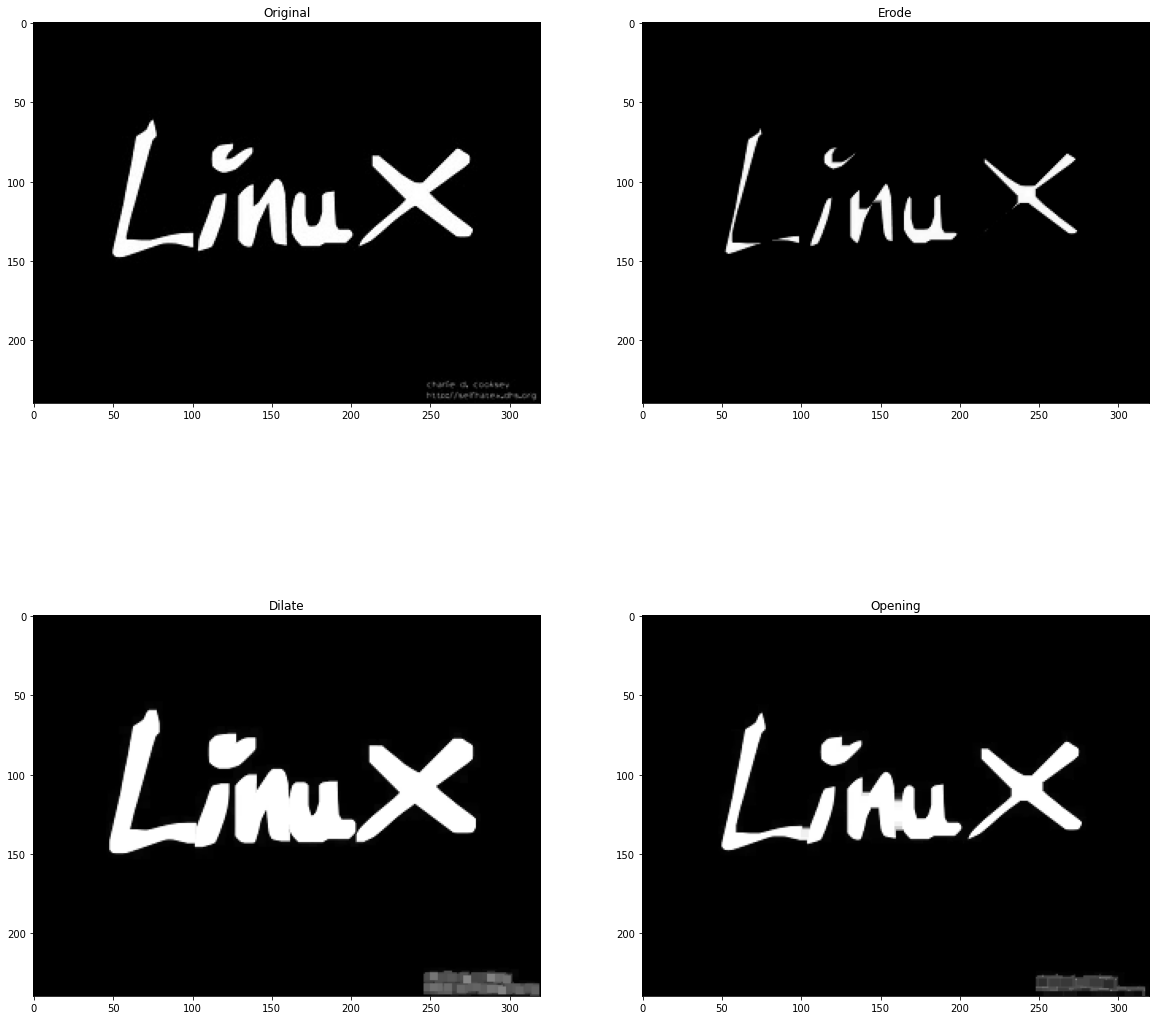

In [27]:
img_path = '/kaggle/input/opencv-samples-images/data/LinuxLogo.jpg'
img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# kernel size 정의
kernel = np.ones((5, 5), np.uint8)

# erosion 공정
img_erode = cv2.erode(img, kernel, iterations = 1)

# dilation 공정 (팽창)
img_dilate = cv2.dilate(img, kernel, iterations = 1)

# Opening : 작은 객체 또는 미세한 객체들 제거
img_opening = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel)

# Closing 
img_closing = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel)

fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize=(20, 20))
ax[0, 0].imshow(img)
ax[0, 0].set_title('Original')
ax[0, 1].imshow(img_erode)
ax[0, 1].set_title('Erode')
ax[1, 0].imshow(img_dilate)
ax[1, 0].set_title('Dilate')
ax[1, 1].imshow(img_closing)
ax[1, 1].set_title('Opening')
plt.show()

## Edge 검출, Image Gradients 

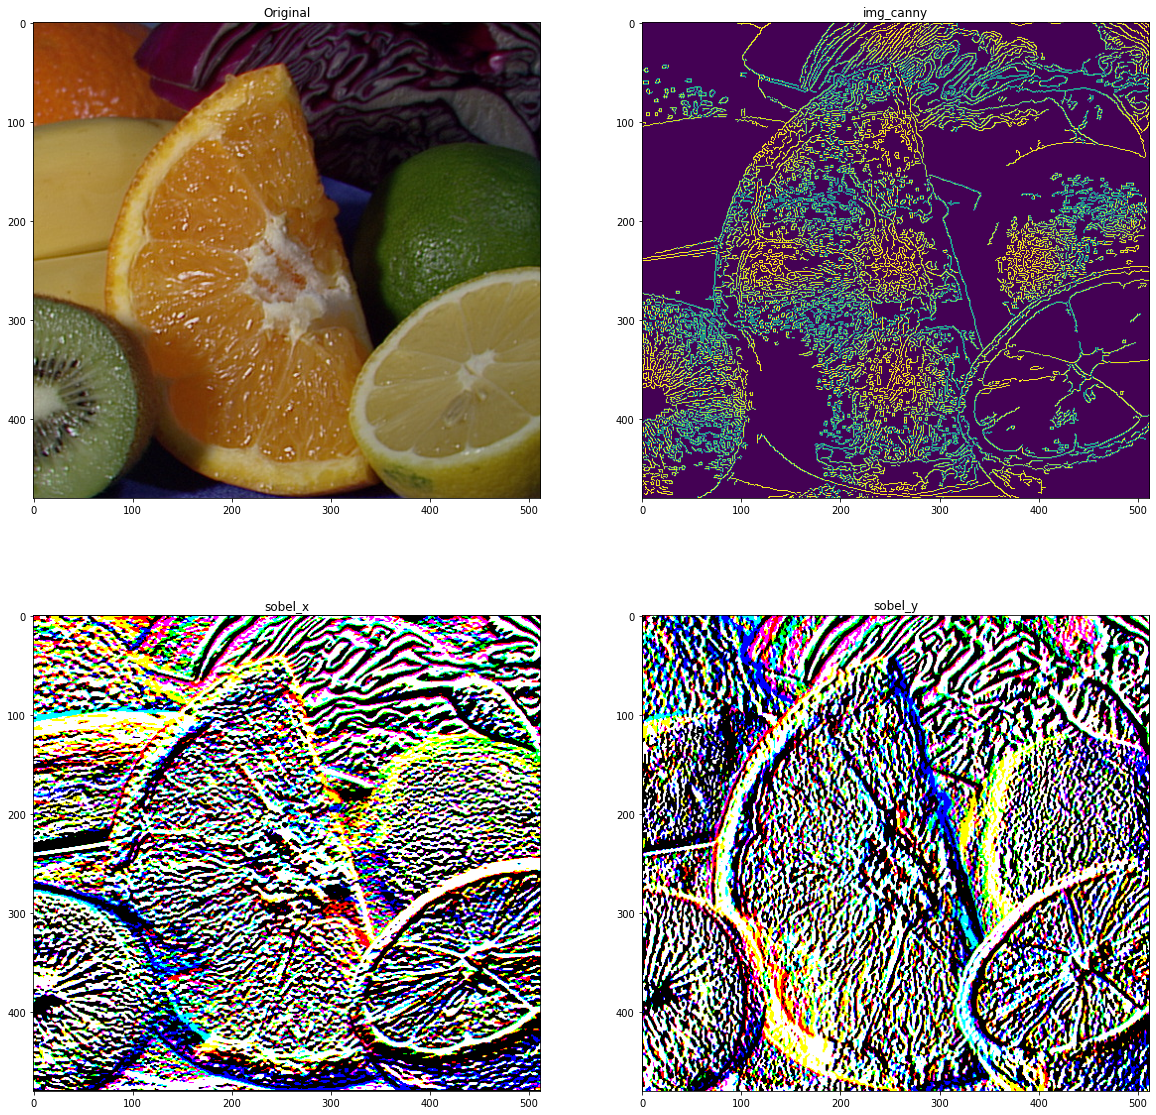

In [31]:
img_path = '/kaggle/input/opencv-samples-images/data/fruits.jpg'
img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Sobel 
sobel_x = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=5)
sobel_y = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=5)

img_canny = cv2.Canny(img, 50, 120)

fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize=(20, 20))
ax[0, 0].imshow(img)
ax[0, 0].set_title('Original')

ax[0, 1].imshow(img_canny)
ax[0, 1].set_title('img_canny')

ax[1, 0].imshow(sobel_x)
ax[1, 0].set_title('sobel_x')

ax[1, 1].imshow(sobel_y)
ax[1, 1].set_title('sobel_y')

plt.show()

## 이미지 회전
- 

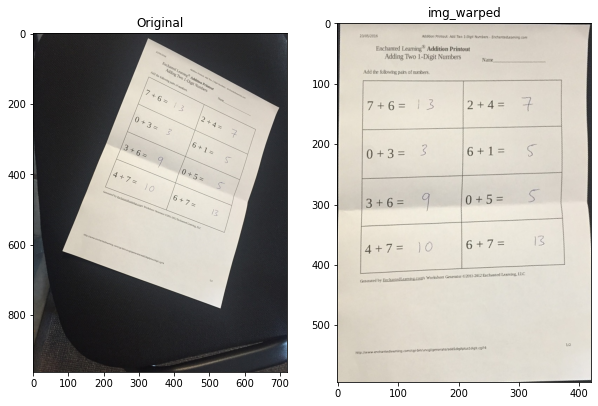

In [34]:
img_path = '/kaggle/input/opencv-samples-images/scan.jpg'
img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 

# cordinates 원래 이미지지
points_A = np.float32([
    [320, 15], [700, 210], [90, 610], [520, 780]
])

# A4 Paper 비율 1:1.41
points_B = np.float32([
    [0,0], [420, 0], [0, 594], [420, 594]
])

img_transform = cv2.getPerspectiveTransform(points_A, points_B)
img_warped = cv2.warpPerspective(img, img_transform, (420, 594))

fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize=(10, 10))
ax[0].imshow(img)
ax[0].set_title('Original')

ax[1].imshow(img_warped)
ax[1].set_title('img_warped')

plt.show()

## 이미지 리사이징
- 이미지 크기를 변환

(480, 512, 3)


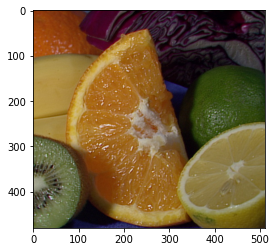

In [4]:
img_path = '/kaggle/input/opencv-samples-images/data/fruits.jpg'
img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

print(img.shape)
fig, ax = plt.subplots()
ax.imshow(img)

plt.show()

(360, 384, 3)


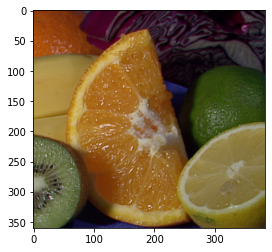

In [39]:
# 3/4
img_scaled = cv2.resize(img, None, fx = 0.75, fy = 0.75)
print(img_scaled.shape)
fig, ax = plt.subplots()
ax.imshow(img_scaled)

plt.show()

(960, 1024, 3)


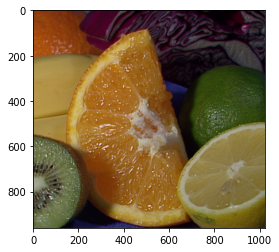

In [42]:
# 이미지 사이즈 크기 2배로 확장
img_scaled = cv2.resize(img, None, fx = 2, fy = 2, 
                        interpolation = cv2.INTER_CUBIC)

print(img_scaled.shape)
fig, ax = plt.subplots()
ax.imshow(img_scaled)

plt.show()

(400, 800, 3)


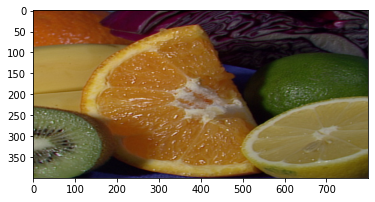

In [5]:
# skew
img_scaled = cv2.resize(img, 
                        (800, 400), 
                        interpolation = cv2.INTER_AREA)
print(img_scaled.shape)
fig, ax = plt.subplots()
ax.imshow(img_scaled)

plt.show()

## 이미지 자르기
- cv2 함수를 사용하는 것이 아님. 
- 배열로 잘라내기

In [19]:
img_path = '/kaggle/input/opencv-samples-images/data/home.jpg'
img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

img.shape

(384, 512, 3)

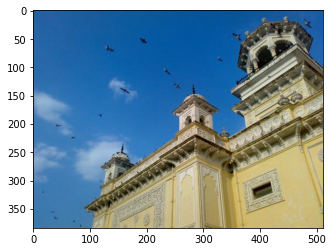

In [20]:
fig, ax = plt.subplots()
ax.imshow(img)
plt.show()

384 512
96 128
288 384


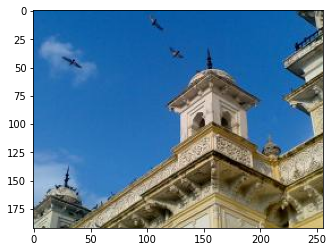

In [21]:
# 높이와 너비 가져오기
height, width = img.shape[:2]
print(height, width)

# pixel 좌표계 설정 (top-left))
start_row, start_col = int(height * .25), int(width * .25)
print(start_row, start_col)
      
# pixel 좌표계 설정 (right-bottom)
end_row, end_col = int(height * .75), int(width * .75)
print(end_row, end_col)

cropped = img[start_row:end_row, start_col:end_col]

fig, ax = plt.subplots()
ax.imshow(cropped)
plt.show()

## Blurring 

(384, 512, 3)


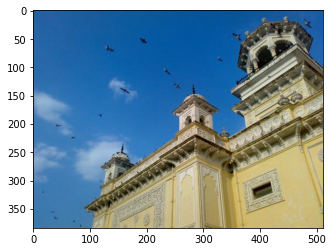

In [23]:
img_path = '/kaggle/input/opencv-samples-images/data/home.jpg'
img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

print(img.shape)

fig, ax = plt.subplots()
ax.imshow(img)
plt.show()

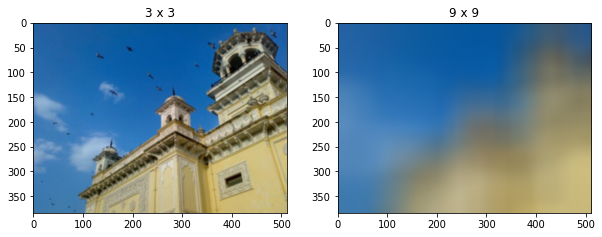

In [30]:
# 3 X 3 
kernel_filter = np.ones((3, 3), np.float32) / 9
img_blurred = cv2.filter2D(img, -1, kernel_filter)

kernel_filter2 = np.ones((100, 100), np.float32) / 10000
img_blurred2 = cv2.filter2D(img, -1, kernel_filter2)

fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize=(10, 10))
ax[0].imshow(img_blurred)
ax[0].set_title('3 x 3')
ax[1].imshow(img_blurred2)
ax[1].set_title('9 x 9')

plt.show()

## Contours 

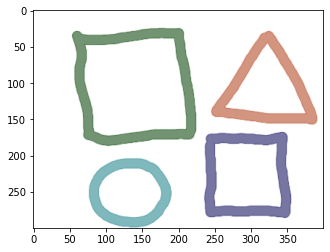

In [31]:
img_path = '/kaggle/input/opencv-samples-images/data/pic3.png'
img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 

fig, ax = plt.subplots()
ax.imshow(img)
plt.show()

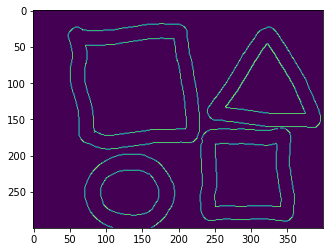

In [44]:
# Edge 
# Gray Scale로 변환
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Canny Edge 함수 활용
img_edged = cv2.Canny(img_gray, 30, 300)
fig, ax = plt.subplots()
ax.imshow(img_edged)
plt.show()

Contours 갯수 :  7


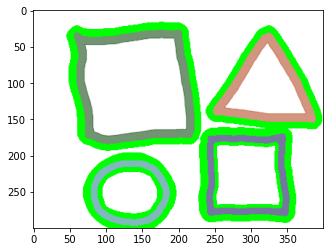

In [45]:
# Contours 찾기
contours, hierarchy = cv2.findContours(img_edged, 
                                       cv2.RETR_EXTERNAL, 
                                       cv2.CHAIN_APPROX_NONE)

print('Contours 갯수 : ', str(len(contours)))

# 모든 contours 이미지 출력 
cv2.drawContours(img, contours, -1, (0, 255, 0), 3)
fig, ax = plt.subplots()
ax.imshow(img)
plt.show()

## Convex Hull 알고리즘
- 볼록 다각형, contour 할 때, 사용
    + 예) 손가락 

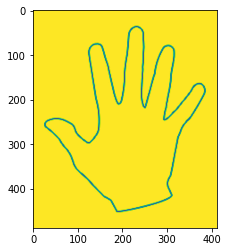

In [51]:
img_path = '/kaggle/input/opencv-samples-images/hand.jpg'
img = cv2.imread(img_path)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

fig, ax = plt.subplots()
ax.imshow(gray)
plt.show()

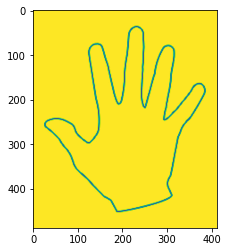

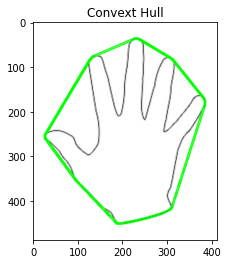

In [59]:
img_path = '/kaggle/input/opencv-samples-images/hand.jpg'
img = cv2.imread(img_path)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

fig, ax = plt.subplots()
ax.imshow(gray)
plt.show()

# Threshold
ret, thresh = cv2.threshold(gray, 176, 255, 0)

# contours 찾기
contours, hierarchy = cv2.findContours(
    thresh.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)

# area에 따라서 contours 정렬
# 가장 큰 프레임을 차지하는 contours 제거
N = len(contours) - 1
contours = sorted(contours, key=cv2.contourArea, reverse=False)[:N]

# 반복문 : convex hull 그려줌
for c in contours: 
    hull = cv2.convexHull(c)
    cv2.drawContours(img, [hull], 0, (0, 255, 0), 2)
    
    plt.subplot()
    plt.title('Convext Hull')
    plt.imshow(img)
    

## 이미지 속에서 특정 객체를 잡기
- 문서 확인 : https://docs.opencv.org/4.7.0/d1/dc5/tutorial_background_subtraction.html

In [65]:
algo = 'MOG2'

if algo == 'MOG2':
    backSub = cv2.createBackgroundSubtractorMOG2()
else:
    backSub = cv2.createBackgroundSubtractorKNN()

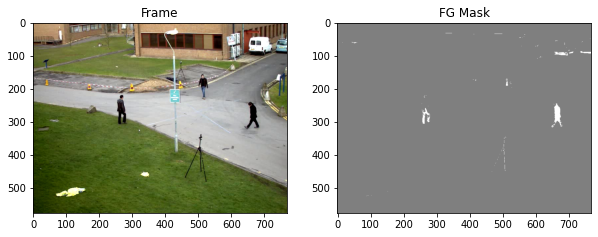

In [68]:
frame_path = '/kaggle/input/opencv-samples-images/Background_Subtraction_Tutorial_frame.png'
frame = cv2.imread(frame_path)
backSub = cv2.createBackgroundSubtractorMOG2()
fgmask = backSub.apply(frame) 

fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize=(10, 10))
ax[0].imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
ax[0].set_title('Frame')
ax[1].imshow(cv2.cvtColor(fgmask, cv2.COLOR_BGR2RGB))
ax[1].set_title('FG Mask')
plt.show()

In [72]:
import cv2 
import numpy as np 

video_path = '/kaggle/input/opencv-samples-images/Background_Subtraction_Tutorial_frame.mp4'

cap = cv2.VideoCapture(cv2.samples.findFileOrKeep(video_path))
width = int(cap.get(3))
height = int(cap.get(4))

print(width, height)

                      # 경로
out = cv2.VideoWriter('Background_Subtraction_Tutorial_frame.mp4', 
                     cv2.VideoWriter_fourcc('M', 'J', 'P', 'G'), 
                     30, 
                     (width, height))

# 그대로 적용 (이미지 처리 한것과 영상처리 하는 것이랑 큰 차이 없다!)
backSub = cv2.createBackgroundSubtractorMOG2()

# 실행
while False: # local while True:
    ret, frame = cap.read() # 영상을 불러와서 ---> 이미지로 자동 변환
    
    # 영상을 못 불러오면 자동으로 종료
    if frame is None:
        break
    
    cv2.rectangle(frame, (10, 2), (100, 20), (255, 255, 255), -1)
    cv2.imshow('Frame', frame)
    fgmask = backSub.apply(frame) 
    cv2.imshow('FG Mask', fgmask)
    out.write(cv2.cvtColor(fgmask, cv2.COLOR_BGR2RGB))
    
    keyboard = cv2.waitKey(1) & 0xFF;
       # ESC
    if (keyboard == 27 or keyboard == ord('q')): 
        cv2.destroyAllWindows()
        break
cap.release()
out.release()
cv2.destroyAllWindows()

768 576


OpenCV: FFMPEG: tag 0x47504a4d/'MJPG' is not supported with codec id 7 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


error: OpenCV(4.5.4) /tmp/pip-req-build-jpmv6t9_/opencv/modules/highgui/src/window.cpp:1268: error: (-2:Unspecified error) The function is not implemented. Rebuild the library with Windows, GTK+ 2.x or Cocoa support. If you are on Ubuntu or Debian, install libgtk2.0-dev and pkg-config, then re-run cmake or configure script in function 'cvDestroyAllWindows'


## 